In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
import sys
sys.path.append("../")
from utils import fehler_gauss
from scipy.optimize import curve_fit

## Beugung Spalt

In [103]:
pos_spalt = 27e-3
u_pos_spalt = 5e-3

pos_laser = 1.5e-2
u_pos_laser = 5e-3

d_schirm_papier = 0.6e-2

u_ablese = 0.5e-3
u_messschieber = 0.05e-3

lambda_laser = 532e-9
u_lambda_laser = 1e-9

beugung_spalt = pd.read_excel("BUB.xlsx", sheet_name="LaserBeugungSpalt")
beugung_spalt[[i for i in range(1, 6)]] *= 1e-2 # Abstaende Minima in cm
beugung_spalt["Position Schirm"] *= 1e-2 # Position Schirm in cm
beugung_spalt

,Position Schirm,1,2,3,4,5
0,1.97,0.0159,0.0314,0.0469,0.06075,0.0752
1,1.30,0.0100,0.0185,0.0255,0.03500,0.0450
2,0.77,0.0055,0.0105,0.0145,0.01900,0.0235


$$\tan \alpha = \frac{s}{l}$$

Die Werte im DataFrame sind die Abstände zwischen zwei Minima gleicher Ordnung, also $2 s$. $l$ ist der Abstand zwischen Spalt und Schirm

In [104]:
s = beugung_spalt[[i for i in range(1, 6)]] / 2
u_s = np.sqrt(u_messschieber**2 + u_ablese**2)

l = beugung_spalt["Position Schirm"] + d_schirm_papier - pos_spalt
u_l = np.sqrt(u_pos_spalt**2 + u_ablese**2 + u_messschieber**2)
u_l

s

,1,2,3,4,5
0,0.00795,0.01570,0.02345,0.030375,0.03760
1,0.00500,0.00925,0.01275,0.017500,0.02250
2,0.00275,0.00525,0.00725,0.009500,0.01175


In [105]:
# alphas in grad
alphas = np.rad2deg(np.arctan(s / l.values.repeat(5, axis=0).reshape((3, 5))))
alphas
# wahnsinnig kleine Winkel, also sin(alpha) = alpha

,1,2,3,4,5
0,0.233709,0.461531,0.689339,0.892878,1.105210
1,0.223985,0.414368,0.571147,0.783904,1.007836
2,0.210364,0.401599,0.554581,0.726677,0.898759


Minima: $n \lambda = d \sin\alpha \approx d \frac{s}{l} \implies n \frac{\lambda}{d} = \frac{s}{l}$
Steigung aus linearer Regression: $m = \frac{\lambda}{d} \implies d = \frac{\lambda}{m}$

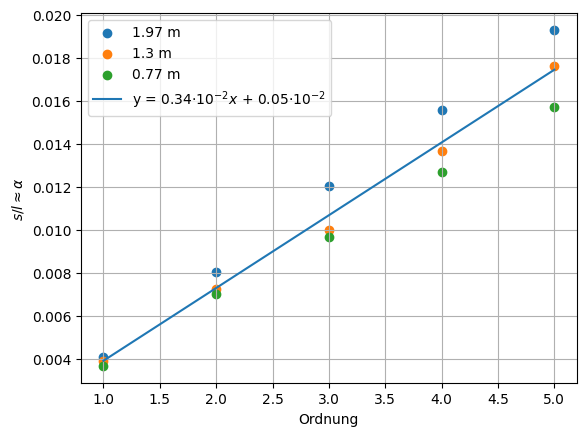

In [134]:
alphas = s / l.values.repeat(5, axis=0).reshape((3, 5))

# Regression s/l gegen Ordnung
def linear(x, m, b):
    return m * x + b

n = alphas.columns.repeat(3).values.reshape((5, 3)).T.flatten()
s_durch_l = alphas.values.flatten()
popt, pcov = curve_fit(linear, n, s_durch_l)

X = np.linspace(n.min(), n.max(), 100)
Y = linear(X, *popt)

for i in range(0, 3):
    plt.scatter(
        x=alphas.columns,
        y=alphas.iloc[i],
        label=f"{beugung_spalt.iloc[i]["Position Schirm"]} m",
    )
fit_label = "y = " + \
    str(np.round(popt[0] * 100, 2)) + r"$\cdot 10^{-2} x$ + " + str(np.round(popt[1] * 100, 2)) + r"$\cdot 10^{-2}$"
plt.plot(X, Y, label=fit_label)
plt.grid(True)
plt.legend()
plt.xlabel("Ordnung")
plt.ylabel(r"$s/l \approx \alpha$")
plt.savefig("beugung_spalt.svg")

In [109]:
lambda_laser / popt[0]

np.float64(0.00015727683616948197)

In [18]:
pd.read_excel("BUB.xlsx", sheet_name="PrismaQuecksilber")

,Farbe,mit,ohne
0,Orange,131.5,179.9
1,Blau,129.4,179.9
2,Gruen,131.6,180.1


In [19]:
pd.read_excel("BUB.xlsx", sheet_name="PrismaEnergiesparlampe")

,Farbe,mit,ohne
0,Orange,130.1,178.4
1,Blau,129.3,179.9
2,Gruen,130.9,179.4
3,Rot,131.6,179.5


## Beugungsgitter

In [20]:
dfs = {
    i: pd.read_excel("BUB.xlsx", sheet_name=f"Beugungsgitter{i}") for i in range(1, 4)
}
pd.concat(dfs)

Blau  Gruen  Orange
1 0   5.1    6.3     6.7
  1  10.2   12.8    13.5
  2  15.3   19.3    20.4
  3  17.9   25.9    27.3
  4   NaN   32.8    35.0
2 0   3.6    4.3     4.7
  1   7.4    8.8     9.3
  2  14.4   13.3    14.1
  3  17.8   17.9    19.1
  4  21.5   22.6    24.2
3 0   2.6    3.3     3.5
  1   5.1    6.4     6.7
  2   7.7    9.6    10.1
  3  10.5   12.8    13.7
  4  14.4   16.5    17.5